In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==5]
df.tail()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
32995,2017-12-31 19:00:00,2563.415615,1249.272994,0.000000,5,1,1,9032.988324,7444.083761,0,0,0,0,0,0,1
32996,2017-12-31 20:00:00,2446.584835,1204.131748,1.975446,5,1,0,2328.723484,7444.083761,0,0,0,0,0,0,1
32997,2017-12-31 21:00:00,2214.268005,1082.285606,1.148236,5,1,0,2328.723484,7444.083761,0,0,0,0,0,0,1
32998,2017-12-31 22:00:00,2318.596948,1175.095957,2.231142,5,1,0,2328.723484,7444.083761,0,0,0,0,0,0,1
32999,2017-12-31 23:00:00,2335.444149,1189.486625,2.356003,5,1,0,2328.723484,7444.083761,0,0,0,0,0,0,1


In [3]:
df=df.drop(columns=['sub_meter_2','sub_meter_1','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,main_meter
timestamp,
2017-01-04 00:00:00,2294.069516
2017-01-04 01:00:00,2316.791252
2017-01-04 02:00:00,2323.616410
2017-01-04 03:00:00,2381.636641
2017-01-04 04:00:00,2473.107079


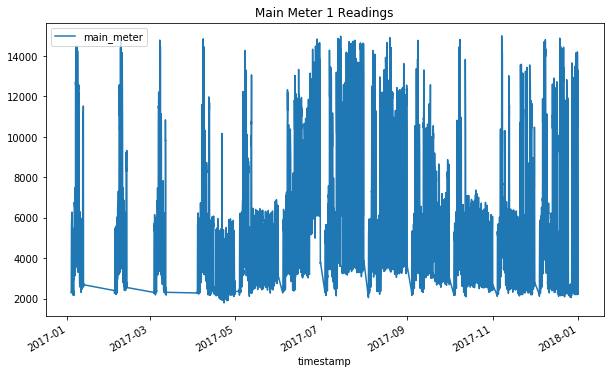

In [4]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

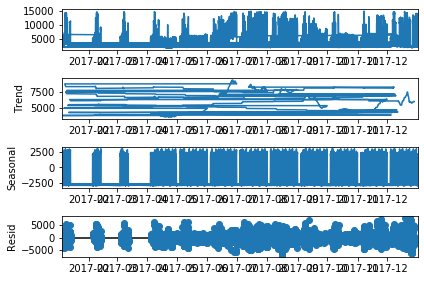

In [5]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [6]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



Fit ARIMA: order=(1, 1, 1); AIC=115926.099, BIC=115953.277, Fit time=1.481 seconds
Fit ARIMA: order=(0, 1, 0); AIC=116364.476, BIC=116378.065, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=116242.254, BIC=116262.638, Fit time=0.028 seconds
Fit ARIMA: order=(0, 1, 1); AIC=116232.991, BIC=116253.375, Fit time=0.024 seconds
Fit ARIMA: order=(2, 1, 1); AIC=115597.735, BIC=115631.708, Fit time=2.311 seconds
Fit ARIMA: order=(2, 1, 0); AIC=116228.793, BIC=116255.971, Fit time=0.034 seconds
Fit ARIMA: order=(2, 1, 2); AIC=115287.891, BIC=115328.659, Fit time=2.837 seconds
Fit ARIMA: order=(3, 1, 3); AIC=115259.170, BIC=115313.528, Fit time=5.166 seconds
Fit ARIMA: order=(2, 1, 3); AIC=115269.067, BIC=115316.630, Fit time=4.208 seconds
Fit ARIMA: order=(4, 1, 3); AIC=115254.935, BIC=115316.087, Fit time=10.450 seconds
Fit ARIMA: order=(4, 1, 2); AIC=115217.205, BIC=115271.563, Fit time=4.508 seconds
Fit ARIMA: order=(3, 1, 1); AIC=115579.338, BIC=115620.106, Fit time=2.629 seconds
Fit

In [7]:
train = df.loc['01-04-2017 00:00:00':'07-11-2017 00:00:00']
test = df.loc['07-11-2017 00:00:00':]
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(4, 1, 4),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [8]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast

array([2836.37034916, 2961.07843583, 2888.29108289, ..., 8624.19663431,
       8509.83416512, 8989.28530131])

In [9]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb5m1.csv')

# add the code to show actual vs predicted
